# Imersão de Dados Alura

## Desafios Aula 03 (21/10/2020)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [23]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

In [24]:
provas.append("NU_NOTA_TOTAL")
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

### Desafio01: Plotar as médias, medianas e moda nas notas de LC e MT (matplotlib linha vertical)

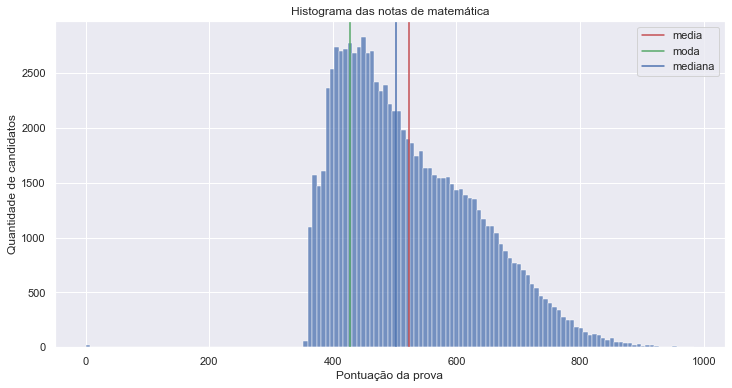

In [33]:
plt.figure(figsize=(12,6))
media = dados_sem_nota_zero['NU_NOTA_MT'].mean()
moda = dados_sem_nota_zero['NU_NOTA_MT'].mode()[0]
mediana = dados_sem_nota_zero['NU_NOTA_MT'].median()
infos = ['media', 'moda', 'mediana']
ax = sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_MT').set(xlabel='Pontuação da prova', 
                                                             ylabel='Quantidade de candidatos')
plt.title('Histograma das notas de matemática')
plt.axvline(media, c='r')
plt.axvline(moda, c='g')
plt.axvline(mediana, c='b')
plt.legend(infos)

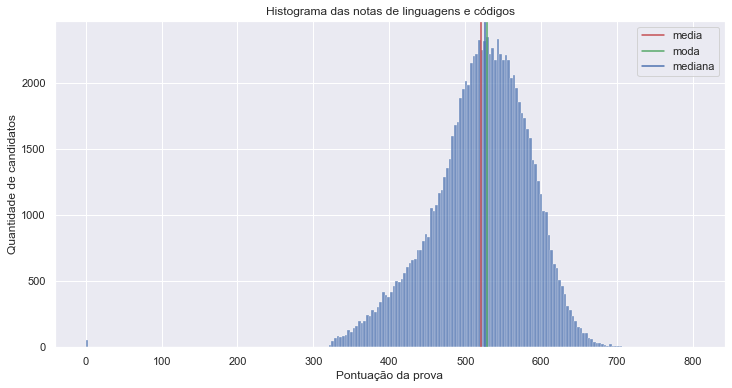

In [32]:
plt.figure(figsize=(12,6))
media = dados_sem_nota_zero['NU_NOTA_LC'].mean()
moda = dados_sem_nota_zero['NU_NOTA_LC'].mode()[0]
mediana = dados_sem_nota_zero['NU_NOTA_LC'].median()
infos = ['media', 'moda', 'mediana']
ax = sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_LC').set(xlabel='Pontuação da prova', 
                                                             ylabel='Quantidade de candidatos')
plt.title('Histograma das notas de linguagens e códigos')
plt.axvline(media, c='r')
plt.axvline(moda, c='g')
plt.axvline(mediana, c='b')
plt.legend(infos)

### Desafio02: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente

In [34]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


<AxesSubplot:>

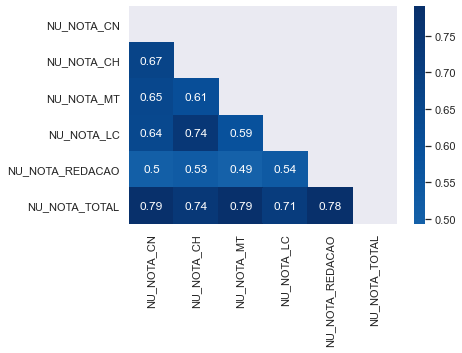

In [35]:
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao, cmap='Blues', center=0, annot=True, mask=mask)

### Desafio03: Filtrar as notas por seu estado ou sua cidade e refazer as analises, verificando se são semelhantes ao geral

In [37]:
dados_sem_nota_zero_sp = dados_sem_nota_zero.query('SG_UF_RESIDENCIA == "SP"')
dados_sem_nota_zero_sp.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
6211,190001247440,2019,3533502,Novo Horizonte,35,SP,19,F,1,3,...,A,A,B,A,A,B,A,A,B,2405.4
7040,190001281453,2019,3528403,Mairinque,35,SP,31,F,1,3,...,A,A,A,A,A,B,A,B,B,3427.9
12953,190001518551,2019,3550308,São Paulo,35,SP,28,M,1,1,...,A,A,A,A,A,B,A,B,B,3604.8
13997,190001560560,2019,3504909,Bananal,35,SP,18,F,1,1,...,A,A,B,A,A,C,A,A,A,2418.5
14209,190001570062,2019,3550308,São Paulo,35,SP,17,M,1,3,...,A,B,C,B,B,C,B,B,B,2726.3


(-50.0, 1000.0)

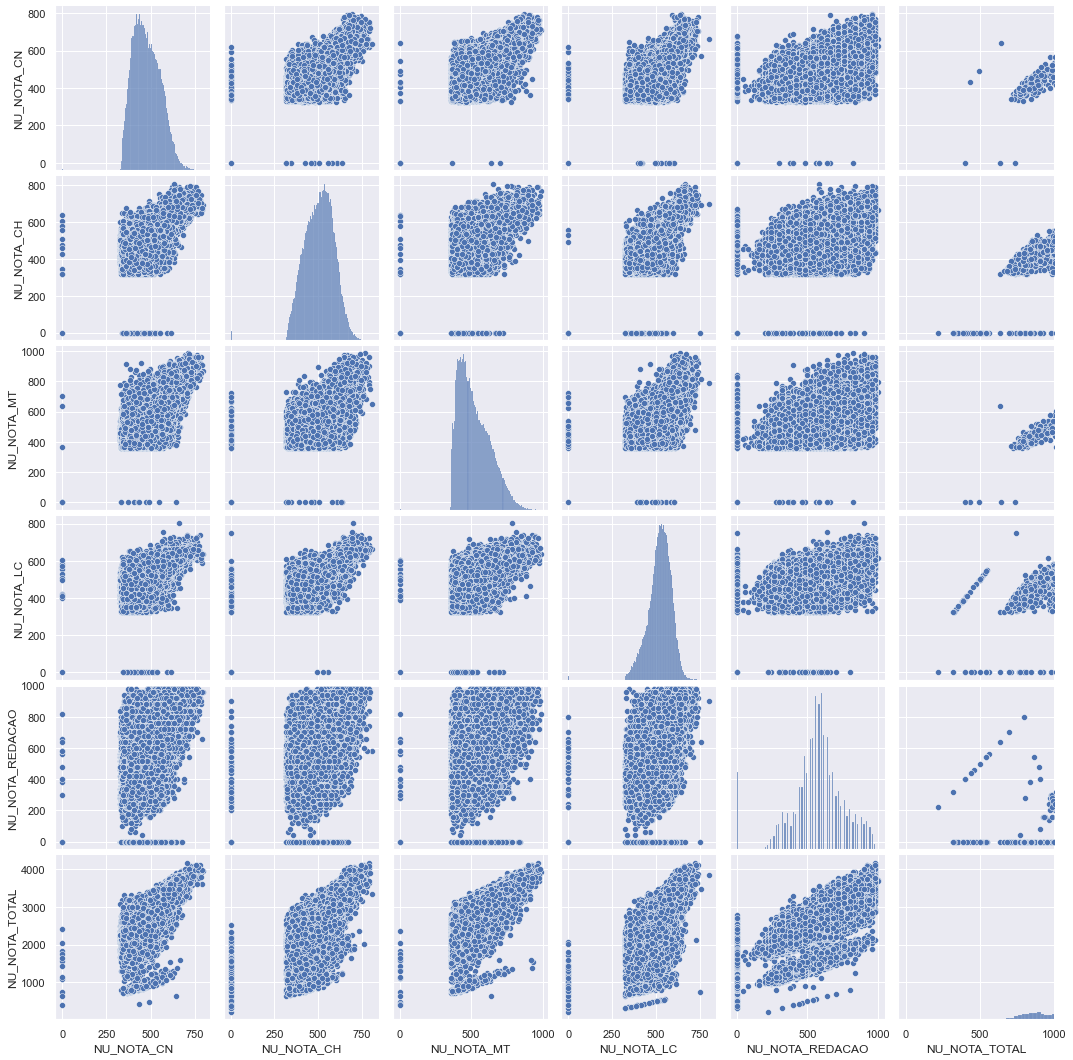

In [40]:
sns.pairplot(dados_sem_nota_zero[provas])
plt.xlim((-50,1000))
plt.ylim((-50,1000))

(-50.0, 1000.0)

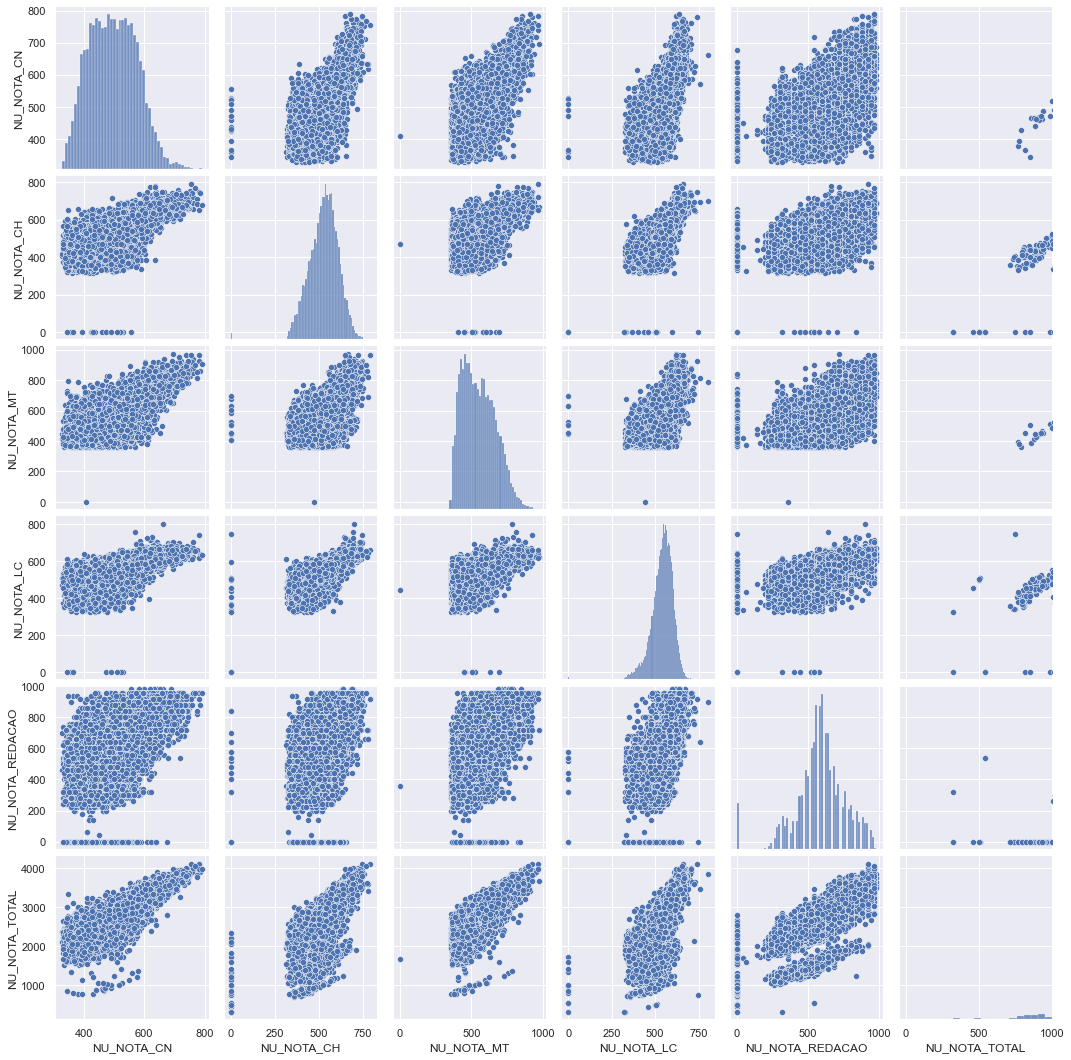

In [41]:
sns.pairplot(dados_sem_nota_zero_sp[provas])
plt.xlim((-50,1000))
plt.ylim((-50,1000))

### Desafio04: Pensar sobre a correlação entre matemática e  linguages

(-50.0, 1000.0)

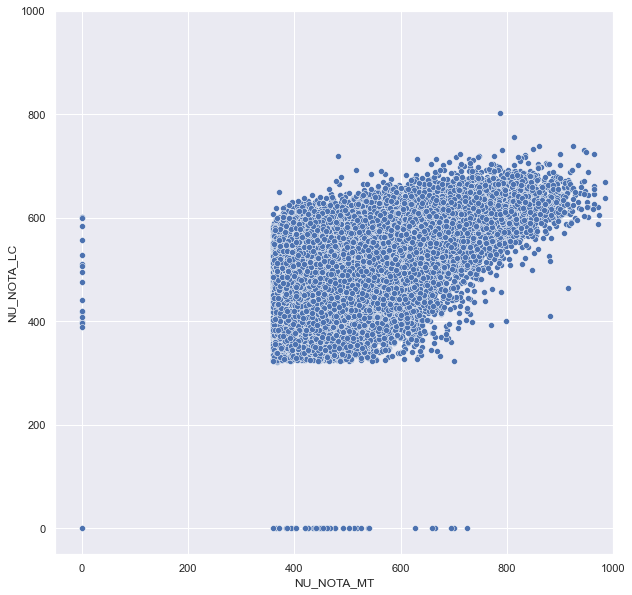

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados_sem_nota_zero, x='NU_NOTA_MT', y='NU_NOTA_LC')
plt.xlim((-50,1000))
plt.ylim((-50,1000))